# Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in csv files
game_df = pd.read_csv('data/clean_game_data.csv')
user_df = pd.read_csv('data/clean_user_data.csv')
rec_df = pd.read_csv('data/clean_recommendations.csv')

## Methodology

The datasets can roughly be split into two categories: user data and game data.  

## Game Data

In [3]:
# convert 'date_release' to datetime
game_df['date_release'] = pd.to_datetime(game_df['date_release'])

In [4]:
# for convenience in the EDA stage, i'll create a dataframe with tags removed
game_notags = game_df.iloc[:, 0:13]

In [5]:
game_notags.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'description'],
      dtype='object')

In [6]:
game_notags.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,description
0,10090,Call of Duty: World at War,2008-11-18,1,0,0,1,92,37039,19.99,19.99,0.0,"Call of Duty is back, redefining war like you'..."
1,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,1,84,2199,9.99,9.99,0.0,Enter the dark underworld of Prince of Persia ...
2,22364,BRINK: Agents of Change,2011-08-03,1,0,0,1,85,21,2.99,2.99,0.0,NaN
3,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,1,92,3722,14.99,14.99,0.0,Monaco: What's Yours Is Mine is a single playe...
4,226560,Escape Dead Island,2014-11-18,1,0,0,0,61,873,14.99,14.99,0.0,Escape Dead Island is a Survival-Mystery adven...


In [7]:
game_notags.describe()

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount
count,4.884400e+04,48844.000000,48844.000000,48844.000000,48844.000000,48844.000000,4.884400e+04,48844.000000,48844.000000,48844.000000
mean,1.020229e+06,0.984625,0.259029,0.179940,0.540558,76.886946,1.751587e+03,8.666656,9.194372,5.051265
std,5.872417e+05,0.123042,0.438106,0.384142,0.498357,18.226042,3.796279e+04,11.518797,11.808135,17.924781
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.151708e+05,1.000000,0.000000,0.000000,0.000000,66.000000,2.000000e+01,0.990000,1.990000,0.000000
50%,9.516050e+05,1.000000,0.000000,0.000000,1.000000,81.000000,5.000000e+01,4.990000,4.990000,0.000000
75%,1.472300e+06,1.000000,1.000000,0.000000,1.000000,91.000000,2.130000e+02,11.690000,12.990000,0.000000
max,2.419270e+06,1.000000,1.000000,1.000000,1.000000,100.000000,6.941137e+06,299.990000,299.990000,90.000000


In [8]:
# popular platforms
platforms = game_df[['win','mac','linux']]
platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   win     48844 non-null  int64
 1   mac     48844 non-null  int64
 2   linux   48844 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


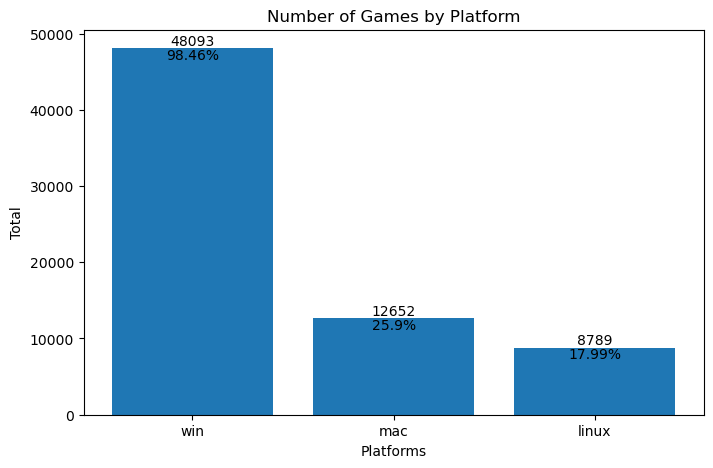

In [9]:
# see platform popularity
plt.figure(figsize=(8,5))

# sum each column
totals = platforms.sum()

plt.bar(totals.index, totals.values)
plt.xlabel('Platforms')
plt.ylabel('Total')
plt.title('Number of Games by Platform')
for index, value in enumerate(totals):
    plt.text(index, value, str(value), ha='center', va='bottom')
    plt.text(index, value, str(round(value/48_844*100,2))+'%', ha='center', va='top')

plt.show()

In [10]:
totals.index

Index(['win', 'mac', 'linux'], dtype='object')

Clearly, Steam games are primarily created to be run on the Windows platform.  Out of 48,844 games, nearly all of them (~98%) can be run on Windows, while ~25% can be run on Mac, and ~18% on Linux.  Note that these totals do not add up to 100% since some games are compatible with multiple platforms.

Next, let's look at which games are the most popular by number of reviews.

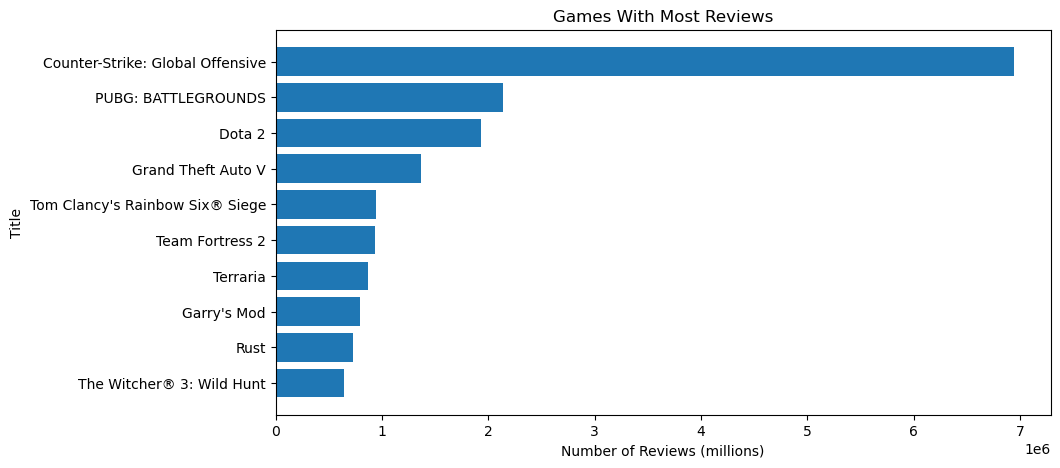

In [11]:
# See the most reviewed games

# sort games by number of user reviews
games_by_reviews = game_df[['title', 'positive_ratio', 'user_reviews']].sort_values(by='user_reviews')
top_10 = games_by_reviews.tail(10)

# plot the top 10
plt.figure(figsize=(10,5))

plt.barh(top_10['title'], top_10['user_reviews'])
plt.title('Games With Most Reviews')
plt.xlabel('Number of Reviews (millions)')
plt.ylabel('Title')

plt.show()

We can also see the positive ratio of those top 10 games.

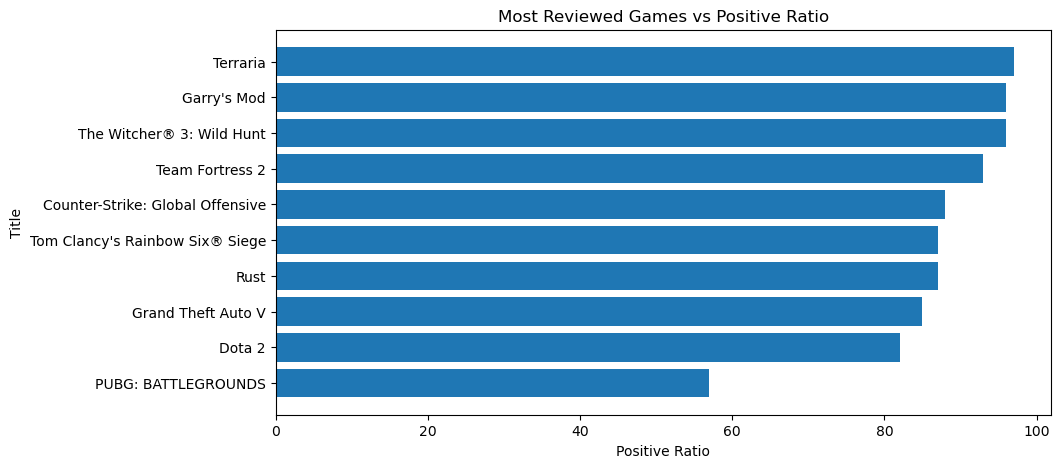

In [12]:
# See positive rating ratio of top 10 games
top10pr = top_10.sort_values(by='positive_ratio')

plt.figure(figsize=(10,5))

plt.barh(top10pr['title'], top10pr['positive_ratio'])
plt.title('Most Reviewed Games vs Positive Ratio')
plt.xlabel('Positive Ratio')
plt.ylabel('Title')

plt.show()

Interestingly, the top 10 games by number of reviews seemingly does not equate to a very high positive ratio.  PUBG, for example, has the second highest number of reviews (just below Counter-Strike), but only a 57% approval rating.  In other words, although the game is highly popular, it is also a devisive game, with a large number of proponents and detractors.

Let's also see which games have the highest positive ratio.

In [13]:
game_df[['title', 'positive_ratio', 'user_reviews']].sort_values(by='positive_ratio', ascending=False)

,title,positive_ratio,user_reviews
24422,Alien Battlefield,100,10
30887,Hidden Shapes Old West - Jigsaw Puzzle Game,100,21
30895,OOZEscape,100,10
30931,Barold,100,16
4501,Sixtar Gate: STARTRAIL - Touhou Project Pack 01,100,26
...,...,...,...
39919,便利商店‪6,0,10
42697,Fray: Reloaded Edition,0,42
39978,Negligee - Walkthrough,0,11
22530,HUNGER,0,11


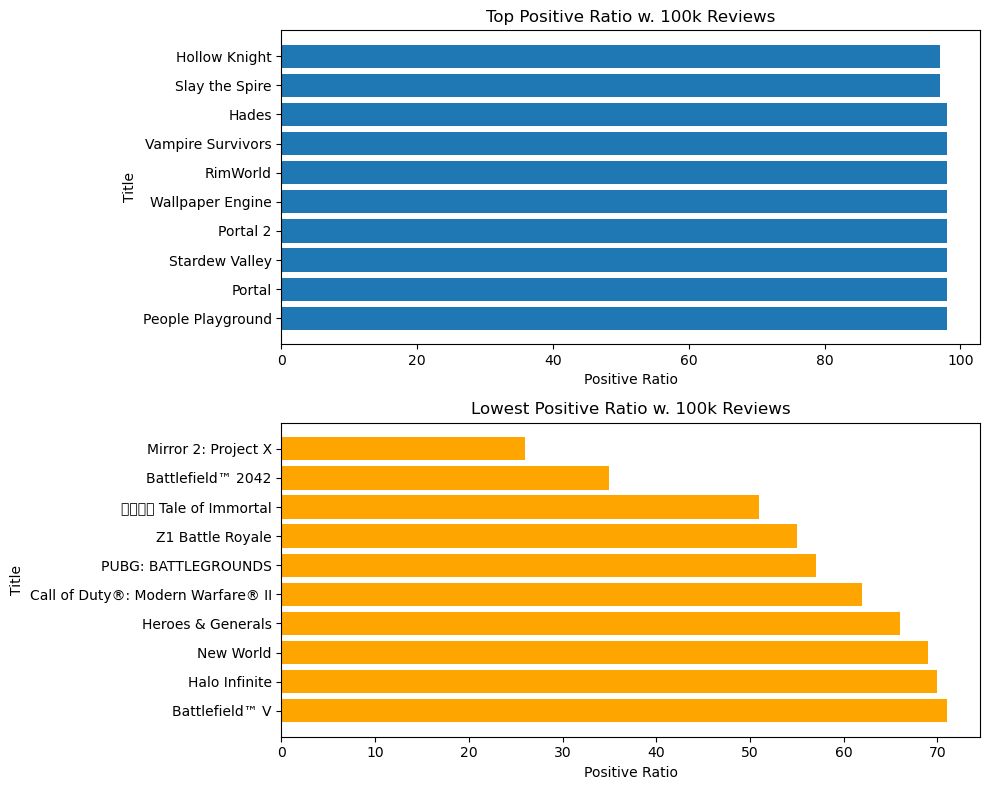

In [69]:
# let's exclude games with fewer than 100,000 reviews and visualize
pos_ratio = game_df.loc[game_df['user_reviews'] >= 100_000, ['title', 'positive_ratio', 'user_reviews']].sort_values(by='positive_ratio', ascending=False)

top_10 = pos_ratio.head(10)
bottom_10 = pos_ratio.tail(10)

plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,1,1)
plt.barh(top_10['title'], top_10['positive_ratio'])
plt.title('Top Positive Ratio w. 100k Reviews')
plt.xlabel('Positive Ratio')
plt.ylabel('Title')

plt.subplot(2,1,2)
plt.barh(bottom_10['title'], bottom_10['positive_ratio'], color='orange')
plt.title('Lowest Positive Ratio w. 100k Reviews')
plt.xlabel('Positive Ratio')
plt.ylabel('Title')

plt.tight_layout()
plt.show()

Arbitarily choosing at least 100,000 reviews yields a few games with exceptionally high positive ratios.  All of the top 10 in this list have nearly universal appeal among people who rate games.  On the other end of the spectrum, the games with more than 100,000 reviews with the lowest ratios.  Interestingly, the second _most_ rated game, PUBG: Battlegrounds, ranks in the bottom 5 of games with at least 100,000 reviews.

Interpreting this loosely, we should expect that a recommendation system should frequently recommend games like "Hollow Knight" and "Portal" to a fictional "average" user while recommending "Battlefield 2042" and "Mirror 2: Project X", with a positive ratio less than 50, far less frequently.  Of course, this tells us almost nothing about a specific user's preferences, but it can provide a high level idea about preferences and therefore whether a recommender system is performing as intended.  It also provides an incentive for further exploration: what is it about some games (like "People Playground") that people tend to enjoy that is lacking from some other games (like Mirror 2)?

To investigate further, let's look at the positive ratio compared the other features for which we have data.

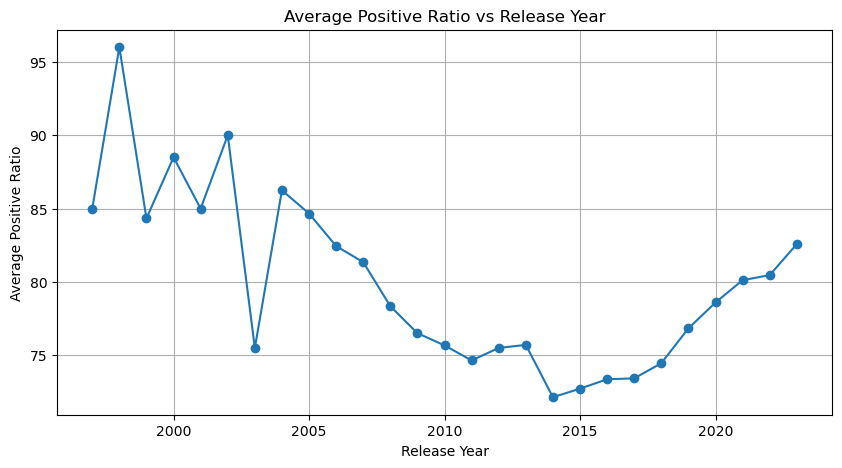

In [24]:
# find avg positive ratio by release year
game_df['release_year'] = game_df['date_release'].dt.year
avg_ratio_year = game_df.groupby(['release_year'])['positive_ratio'].mean()

# Plot the average positive ratio against the release year
plt.figure(figsize=(10, 5))
plt.plot(avg_ratio_year.index, avg_ratio_year.values, marker='o')
plt.title('Average Positive Ratio vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Positive Ratio')
plt.grid(True)

# dropping 'release_year' since it is no longer needed
game_df.drop(columns='release_year', inplace=True)

There are no obvious trends in the average positive ratio by release year.  Apparently 2014 was a bad year for games while 1998 was a particularly good game, although that could partly be explained by the number of games varying year by year.  In addition, older games that were added to steam later were likely selected for their quality (or nostalgia, etc.) while new games that are release on the platform do not have that benefit.

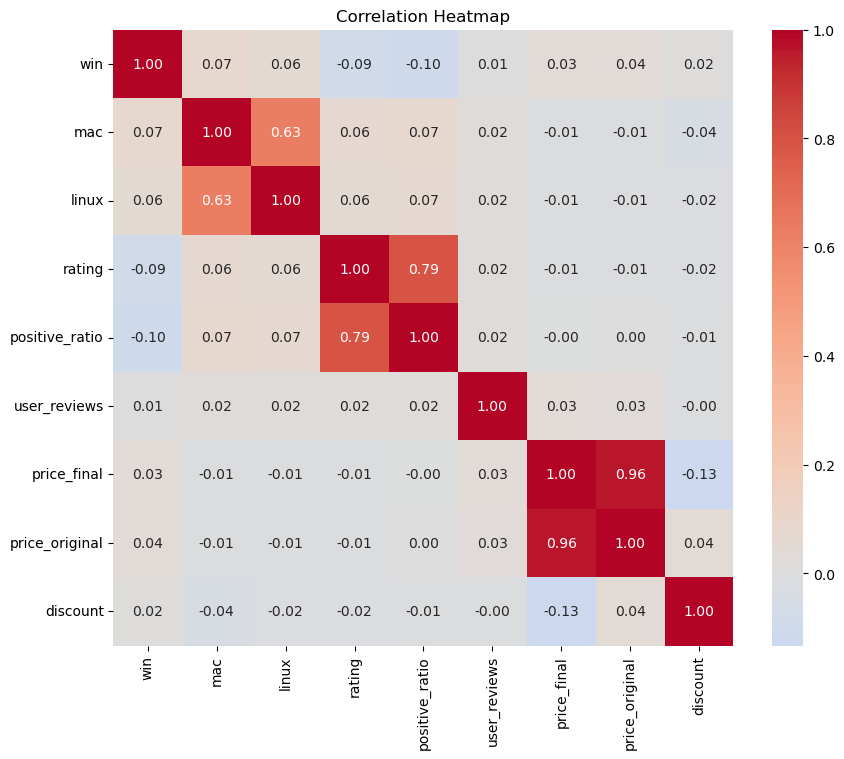

In [28]:
# Specify the columns you want to include in the correlation heatmap
interesting_columns = ['win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']

# Create a correlation matrix for the selected columns
correlation_matrix = game_df[interesting_columns].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.show()

Here we care about the relationship that columns have with a game's `Positive Ratio` 

In [33]:
# get the tags columns
tags_df = game_df.drop(columns=game_notags.columns)
tags_df.head()

,t_1980s,t_1990's,t_2.5D,t_2D,t_2D Fighter,t_2D Platformer,t_360 Video,t_3D,t_3D Fighter,t_3D Platformer,...,t_Well-Written,t_Werewolves,t_Western,t_Wholesome,t_Word Game,t_World War I,t_World War II,t_Wrestling,t_Zombies,t_eSports
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# find the most common tags
tags_df.sum().sort_values(ascending=False)

t_Indie            27372.0
t_Singleplayer     22053.0
t_Action           21595.0
t_Adventure        19828.0
t_Casual           17300.0
                    ...   
t_Volleyball           9.0
t_Tile-Matching        5.0
t_Coding               4.0
t_Hobby Sim            4.0
t_Fox                  4.0
Length: 441, dtype: float64

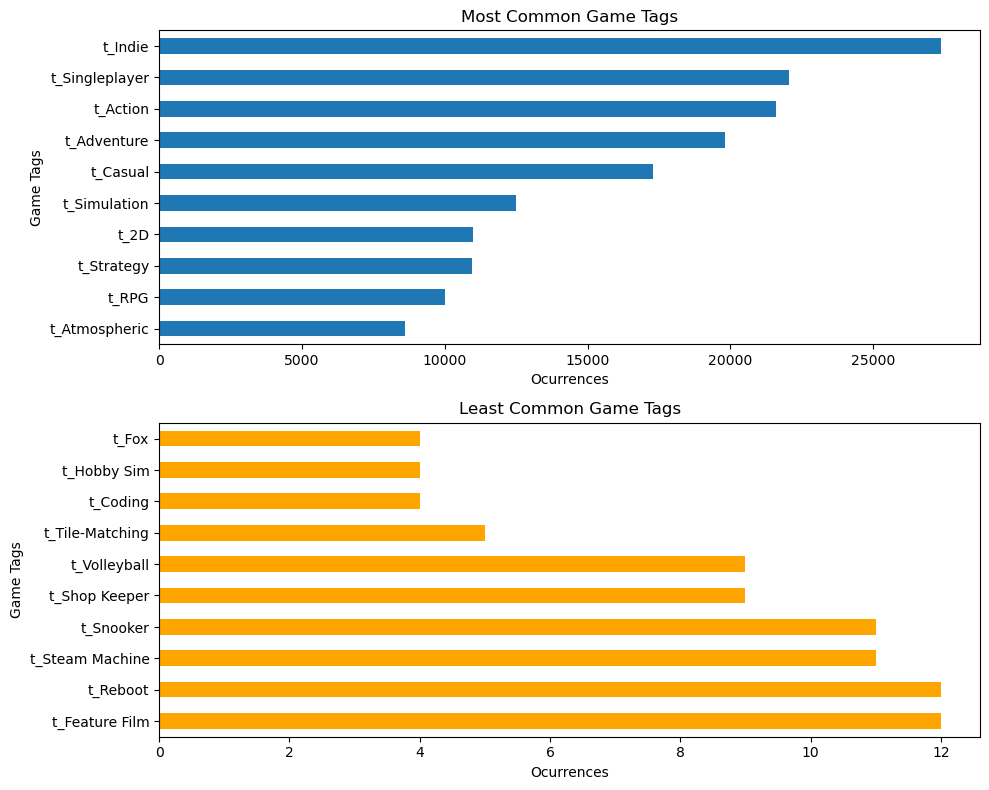

In [64]:
# visualize most common tags

plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,1,1)
tags_df.sum().sort_values().tail(10).plot(kind='barh')
plt.xlabel('Ocurrences')
plt.ylabel('Game Tags')
plt.title('Most Common Game Tags')

plt.subplot(2,1,2)
tags_df.sum().sort_values(ascending=False).tail(10).plot(kind='barh', color='orange')
plt.xlabel('Ocurrences')
plt.ylabel('Game Tags')
plt.title('Least Common Game Tags')

plt.tight_layout()
plt.show()

On its own, this doesn't tell us too much

## User Data

When conducting exploratory data analysis (EDA) for datasets that you want to use for a recommender system, there are several key aspects to consider. Here are some EDA tasks you can perform on your Steam games and user reviews datasets:

For Steam Games Dataset:

Data Cleaning and Missing Values: Examine the dataset for missing values, inconsistencies, or errors. Clean the data by handling missing values, correcting inconsistencies, and ensuring data integrity.

Descriptive Statistics: Calculate basic statistics such as mean, median, standard deviation, and quartiles for numerical columns like 'Owners', 'Positive Reviews', 'Negative Reviews', 'Price', etc. This helps you understand the distribution and characteristics of the data.

Categorical Variables: Explore categorical variables like 'Developer', 'Publisher', 'Genre', 'Tags', 'Type', etc. Investigate the unique categories, their frequencies, and identify the most common or popular categories.

Genre and Tag Analysis: Analyze the distribution of game genres and tags. Identify the most prevalent genres and tags to gain insights into the gaming landscape and potential patterns in user preferences.

Price and Discounts: Examine the pricing information and discounts offered for games. Investigate the distribution of prices, the range of discounts, and their impact on sales or popularity.

Time Analysis: Explore the 'Release Date' column to understand the temporal distribution of game releases. Analyze trends, seasonality, or patterns related to game launches.

For User Reviews Dataset:

Review Statistics: Calculate summary statistics for variables like 'helpful', 'funny', 'hours'. Analyze the distribution of these variables to understand user engagement and interaction patterns.

Review Sentiment Analysis: Analyze the sentiment of user reviews. Use natural language processing techniques to determine the sentiment polarity (positive, negative, neutral) of the reviews. This can provide insights into user satisfaction or dissatisfaction with the games.

User Interactions: Explore the 'user_id' column to identify the number of reviews per user, the most active users, or users with the highest ratings. This analysis can help understand user behavior and identify influential users.

Relationships between User Reviews and Game Attributes: Investigate the relationships between user reviews and game attributes. For example, examine how user sentiment or review ratings vary based on game genre, developer, or price.

Review Date Analysis: Analyze the distribution of review dates. Identify patterns, seasonalities, or trends in user reviews that can provide insights into temporal dynamics or user engagement over time.

Correlations: Explore correlations between different variables. For example, examine correlations between review helpfulness and review ratings or hours played.

These EDA tasks will help you gain a better understanding of the data, identify patterns, and generate insights that can guide your recommender system development process.

In [3]:
# looking at users who have reviewed items in the recommendations_df

super_user = rec_df['user_id'].value_counts().idxmax()
super_user_review_count = rec_df[rec_df['user_id'] == 5644568].count()
review_mean = rec_df['user_id'].value_counts().mean()
review_median = rec_df['user_id'].value_counts().median()


print(f'user with the most reviews: {super_user}')
print(f'That user provided {super_user_review_count} reviews')
print(f'The mean number of reviews by users: {review_mean}')
print(f'The median number of reviews by users: {review_median}')

user with the most reviews: 5644568
That user provided app_id            405
helpful           405
funny             405
review_date       405
is_recommended    405
hours             405
user_id           405
review_id         405
dtype: int64 reviews
The mean number of reviews by users: 2.1126516994158564
The median number of reviews by users: 1.0


In [4]:
user_review_counts = rec_df['user_id'].value_counts()

# Get the user IDs with a count of 1 (users with a single review)
users_with_single_review = user_review_counts[user_review_counts == 1].index

# Filter out the rows corresponding to users with a single review
rec_df = rec_df[~rec_df['user_id'].isin(users_with_single_review)]

In [9]:
super_user = rec_df['user_id'].value_counts().idxmax()
# super_user_review_count = recommendations_df[recommendations_df['user_id'] == 5644568].count()
review_mean = rec_df['user_id'].value_counts().mean()
review_median = rec_df['user_id'].value_counts().median()


print(f'user with the most reviews: {super_user}')
# print(f'That user provided {super_user_review_count} reviews')
print(f'The mean number of reviews by users: {review_mean}')
print(f'The median number of reviews by users: {review_median}')

user with the most reviews: 5644568
The mean number of reviews by users: 3.9699563563928915
The median number of reviews by users: 3.0


In [10]:
# find unique number of users after filtering
rec_df['user_id'].nunique()

2586404

In [11]:
rec_df['is_recommended'].value_counts(normalize=True) 

1    0.849407
0    0.150593
Name: is_recommended, dtype: float64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

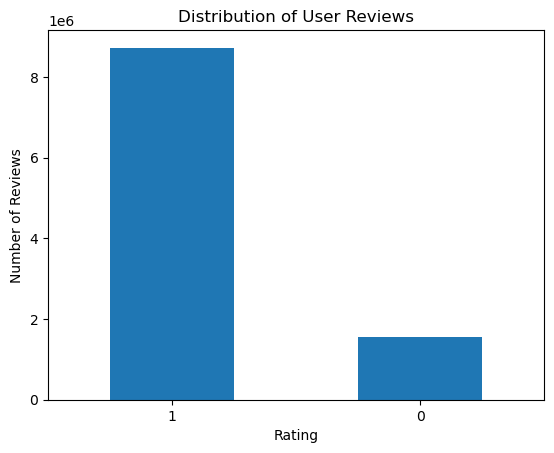

In [8]:
rec_df['is_recommended'].value_counts().plot(kind='bar')
plt.title('Distribution of User Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)